# **Import all the needed library**

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix

# Sparse matrix operations
from scipy.sparse import hstack, csr_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

 # **Import the data from csv file**

In [4]:
#Read csv file
book_data_encoded = pd.read_csv("book_data_encoded.csv")
book_data_encoded.info()
book_data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   asin                                        129462 non-null  object 
 1   title                                       129462 non-null  object 
 2   author                                      129462 non-null  object 
 3   stars                                       129462 non-null  float64
 4   price                                       129462 non-null  float64
 5   isKindleUnlimited                           129462 non-null  bool   
 6   category_id                                 129462 non-null  int64  
 7   isBestSeller                                129462 non-null  bool   
 8   isEditorsPick                               129462 non-null  bool   
 9   isGoodReadsChoice                           129462 non-null  bool   
 

,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---

# **Model 1: Classification Tree - Max Depth of 4**

## **I. Data Preparation:**
- **Response and Predictors:**
   - Predictors:
   > `Title`\
   > `Author`\
   > `Genre`\
   > `Star rating`\
   > `Price`
   - Response: `isBestSeller`.

- **Train-Test Split**:
   - Dataset split: **80% training**, **20% testing**, ensuring robust evaluation.

- **TF-IDF Vectorization**:
   - Text data (`title`) is transformed into numeric features using the **TF-IDF** method.
   - Sparse matrices are created for numeric features for efficiency.

## **II. Model Training:**
- **Feature Combination**:
   - Features are combined into a single matrix for training and testing.

- **Decision Tree**:
   - A **DecisionTreeClassifier** is trained using predictors to give the response.

## **III. Visualization:**
- **Decision Tree Plot**:
   - Tree visualization is created with clear labels for feature names and class outcomes (False, True).
   - Enables interpretation of classification rules and feature importance.

This workflow ensures efficient data handling, feature engineering, and meaningful visualization for interpreting the classification model.

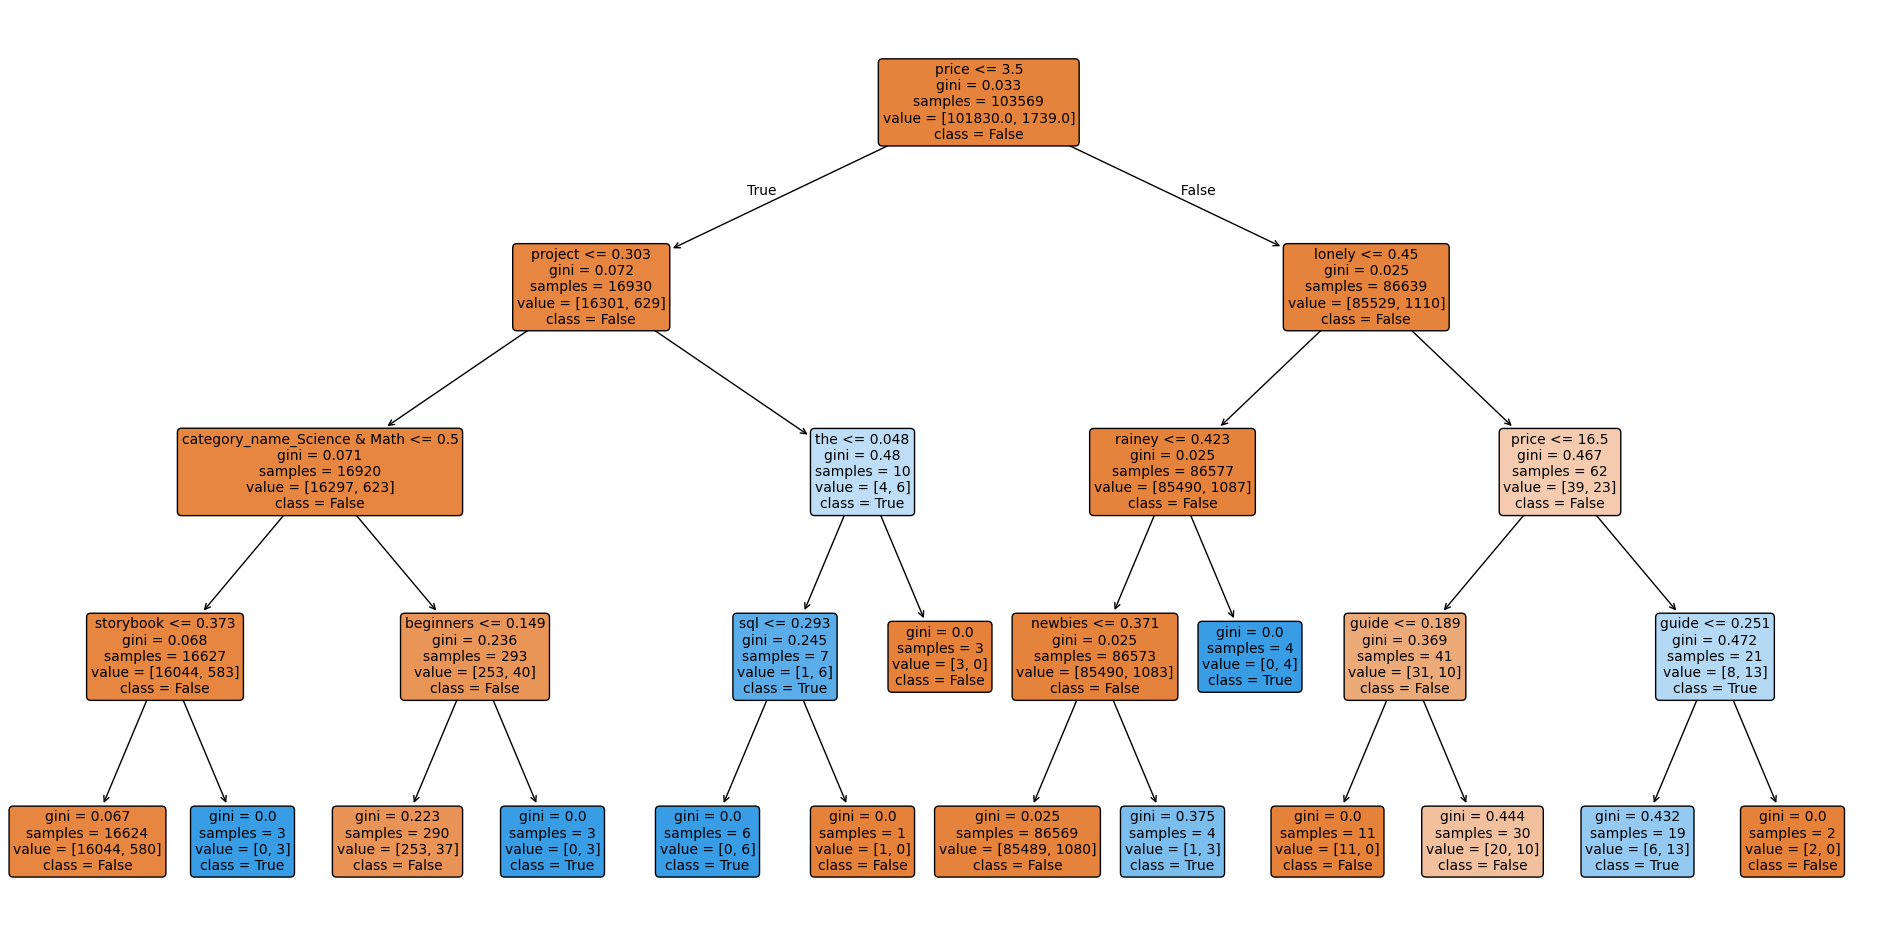

In [5]:
# Extract response and predictor variables
X_text = book_data_encoded['title']
X_other = book_data_encoded.drop(columns=['asin', 'title', 'author', 'isKindleUnlimited', 'category_id',
                                          'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice'])
y = book_data_encoded['isBestSeller']

# Split the dataset into training and testing sets
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(X_text, X_other, y, test_size=0.2)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

X_other_train = X_other_train.astype(int)
X_other_test = X_other_test.astype(int)

# Convert numeric features to sparse matrices
X_other_train_sparse = csr_matrix(X_other_train.values)
X_other_test_sparse = csr_matrix(X_other_test.values)

# Combine text and numeric features
X_train_combined = hstack([X_text_train_tfidf, X_other_train_sparse])
X_test_combined = hstack([X_text_test_tfidf, X_other_test_sparse])

# Get combined feature names
text_feature_names = vectorizer.get_feature_names_out()
numeric_feature_names = X_other_train.columns.tolist()
combined_feature_names = list(text_feature_names) + numeric_feature_names

# Train a decision tree classifier
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train_combined, y_train)

# Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(dectree, filled=True, rounded=True, feature_names=combined_feature_names,
          class_names=["False", "True"], fontsize=10)
plt.show()

### **Overview:**
A decision tree was trained to classify books based on features such as price, text data (TF-IDF vectors), and numeric predictors. The tree splits data into two classes: **True** (bestseller) and **False** (non-bestseller), using feature thresholds and impurity metrics.

### **Key Highlights:**
1. **Root Node**:
   - Splits data on `price <= 3.5`, with a **Gini impurity of 0.033** and **103,569 samples**.
   - Predicts False for non-bestsellers as the majority class.

2. **Second-Level Nodes**:
   - Splits involve features such as `project <= 0.303` and `lonely <= 0.45`.
   - Provides further refinement by isolating subsets with **low impurity values**.

3. **Leaf Nodes**:
   - Terminal nodes represent subsets with pure or almost pure classifications, offering clear predictions.


# **Checking accuracy**

After training the classification tree (max depth = 4) model, we will check the accuracy for training dataset and testing dataset

##  **I. Train Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate

Train Data
Accuracy  :	 0.9834506464289507

TPR Train :	 0.018401380103507763
TNR Train :	 0.9999312579789846

FPR Train :	 6.874202101541785e-05
FNR Train :	 0.9815986198964922


<Axes: >

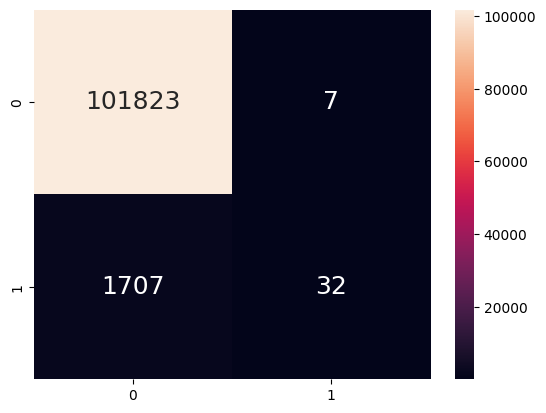

In [6]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_combined)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train_combined, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 101,823 books were correctly classified as non-bestsellers.
- **True Positives (TP)**: Only 32 books were correctly identified as bestsellers.
- **False Negatives (FN)**: 1,707 bestsellers were misclassified as non-bestsellers.
- **False Positives (FP)**: 7 non-bestsellers were misclassified as bestsellers.

### **Key Metrics:**
1. **Overall Accuracy**:
  - The decision tree achieved an **accuracy of 98.35%**, indicating strong general performance across training data.

2. **True Positive Rate (TPR)**:
   - **1.84%** TPR reflects the model's limited sensitivity to correctly identify bestsellers (positive class). This indicates room for improvement in recognizing this group effectively.

3. **True Negative Rate (TNR)**:
   - A near-perfect **99.99% TNR** confirms the model's exceptional ability to correctly classify non-bestsellers (negative class).

4. **False Positive Rate (FPR)**:
   - The **0.006% FPR** demonstrates minimal misclassification of non-bestsellers as bestsellers.

5. **False Negative Rate (FNR)**:
   - **98.16% FNR** highlights challenges in classifying bestsellers correctly, resulting in a high proportion of missed positives.



## **II. Test Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate


Test Data
Accuracy  :	 0.9843200865098676

TPR Test :	 0.007462686567164179
TNR Test :	 0.9997253932760582

FPR Test :	 0.00027460672394178336
FNR Test :	 0.9925373134328358


<Axes: >

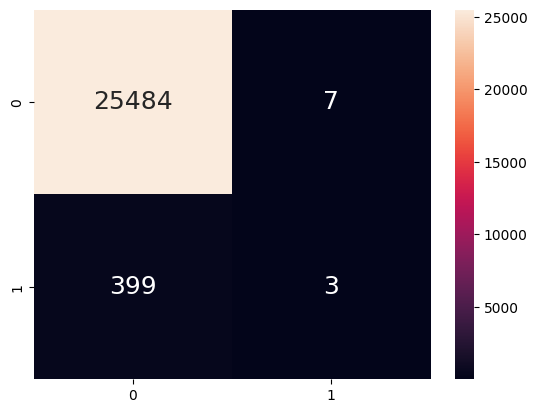

In [7]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test_combined)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test_combined, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 25,484 books correctly classified as non-bestsellers.
- **True Positives (TP)**: 3 bestsellers correctly classified.
- **False Negatives (FN)**: 399 bestsellers misclassified as non-bestsellers.
- **False Positives (FP)**: 7 non-bestsellers misclassified as bestsellers.

### **Key Metrics:**
1. **Accuracy**:
   - The model achieved **98.43%**, reflecting high overall correctness in predictions.
2. **True Positive Rate (TPR)**:
   - **0.75%**, indicating the model failed to identify any bestsellers.
3. **True Negative Rate (TNR)**:
   - **99.97%**, showcasing exceptional specificity in identifying non-bestsellers.
4. **False Positive Rate (FPR)**:
   - **0.03%**, highlighting minimal misclassification of non-bestsellers.
5. **False Negative Rate (FNR)**:
   - **99.25%**, showing significant challenges in recognizing bestseller books.


# **Conclusion:**

- **Model 1** predict significantly accurate for non bestseller books. However, it misclassified most of best seller books. This is because the dataset contains only a small proportion of bestseller books.
- To improve our model, we will balance the dataset by choosing some representatives for non bestseller books while resample bestseller books.